<a href="https://colab.research.google.com/github/emanbuc/ultrasonic-vision/blob/main/data_visualizzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Univariate Plots
Techniques that you can use to understand each attribute independently.

## Histograms
A fast way to get an idea of the distribution of each attribute is to look at histograms.

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian’, skewed or even has an exponential distribution. It can also help you see possible outliers

     HCSR04_001  HCSR04_002  HCSR04_003  ...  HCSR04_005  HCSR04_006  HCSR04_007
0         53.25       54.19       56.01  ...       50.57       51.90       23.33
1         53.21       54.23       55.98  ...       50.49       51.39      117.41
2         53.16       54.62       56.41  ...       50.11       51.91      109.82
3         53.18       54.64       56.03  ...       50.49       51.44      104.63
4         53.31       54.58       56.39  ...       50.11       51.40      105.24
..          ...         ...         ...  ...         ...         ...         ...
496       40.35       19.25       38.56  ...       30.85       57.15      119.41
497       40.43       19.68       38.56  ...       30.86       57.93      112.06
498       40.34       19.70       38.49  ...       30.91       57.62      111.50
499       40.42       19.70       38.51  ...       30.90       57.91      111.54
500       40.30       19.31       38.57  ...       30.96       57.53      110.89

[501 rows x 7 columns]


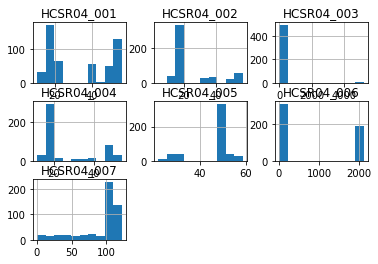

In [11]:
# Univariate Histograms
import matplotlib.pyplot as plt
import pandas
url = "https://raw.githubusercontent.com/emanbuc/ultrasonic-vision/main/sample_acquisitions/7sensors/20210102/20210102_alldata.csv"

names = ['HCSR04_001', 'HCSR04_002', 'HCSR04_003', 'HCSR04_004', 'HCSR04_005', 'HCSR04_006', 'HCSR04_007']
data = pandas.read_csv(url, usecols=names)
print(data)
data.hist()
plt.show()

### Density Plots
Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

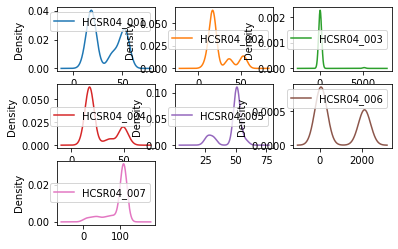

In [12]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [ ]:
La distanza stimata da HCSR04_006, HCSR04_007 è errata: la distanza reale era compresa tra i 20 -70 cm

### Box and Whisker Plots
Another useful way to review the distribution of each attribute is to use Box and Whisker Plots or boxplots for short.

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

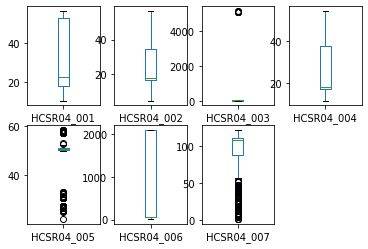

In [15]:
data.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()

# Multivariate Plots
Examples of plots with interactions between multiple variables.

## Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other.

This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

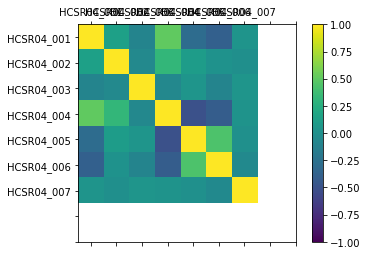

In [17]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Scatterplot Matrix
A scatterplot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. Drawing all these scatterplots together is called a scatterplot matrix.

Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

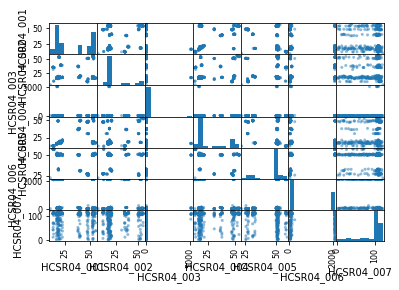

<Figure size 1080x864 with 0 Axes>

In [21]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

# New Features

In [23]:
data['distanceSumHi'] = data.HCSR04_001 + data.HCSR04_002
data['distanceSumLow'] = data.HCSR04_003 + data.HCSR04_004

In [24]:
df = data.groupby(['ObjectClass'])
print(df)

KeyError: ignored